Kyphosis is an abnormally excessive convex curvature of the spine with data representing the patients after surgery.

In [74]:
#importing libraries
import pandas as pd                
import numpy as np                  
import matplotlib.pyplot as plt    
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv('kyphosis.csv')

In [20]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

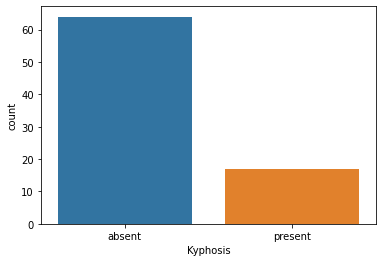

In [23]:
#Visualizing dataset
sns.countplot(data['Kyphosis'], label = 'Count')

64 with out kyphosis and 18 still with the kyphosis even after surgery 

In [31]:
#Preprocessing the data
LabelE = LabelEncoder()

#Replacing Kyphosis column ('absent and present') with 0 and 1
data['Kyphosis'] = LabelE.fit_transform(data['Kyphosis'])

In [33]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [39]:
# absent after opertation
kyphosis_False = data[data['Kyphosis']== 0]
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(data)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [41]:
# present after operation
kyphosis_True = data[data['Kyphosis']== 1]
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(data)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


<AxesSubplot:>

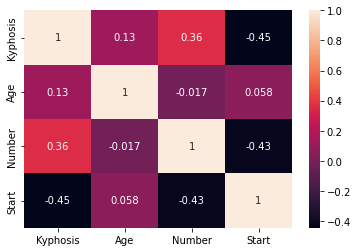

In [43]:
# Correlation 
sns.heatmap(data.corr(), annot = True)

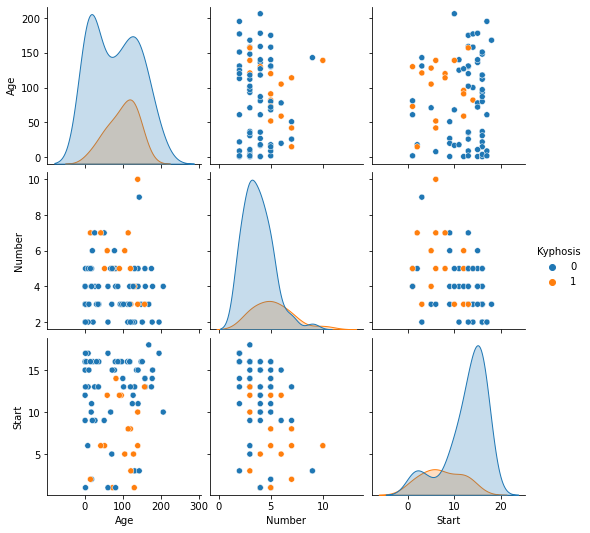

In [46]:
# Visualize 
sns.pairplot(data, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

In [49]:
# Testing and Training dataset
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [51]:
data = data[['Age','Number','Start','Kyphosis']]

In [55]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [67]:
# Training a decision Tree classifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
y_predict_test = decision_tree.predict(X_test)

In [69]:
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [71]:
confusionmatrix = confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

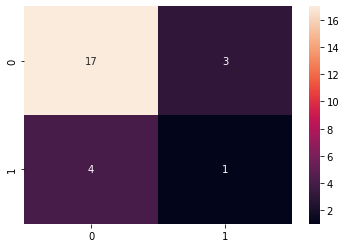

In [72]:
sns.heatmap(cm, annot = True)

In [73]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.25      0.20      0.22         5

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.70      0.72      0.71        25



In [75]:
#Random forest is much better to improve the model
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [76]:
y_predict_test = RandomForest.predict(X_test)

<AxesSubplot:>

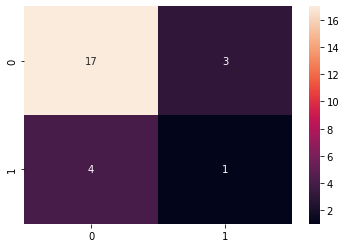

In [77]:
confusionmatrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [78]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25

